# Import liberaries


In [1]:
# data analysis and wrangling
import pandas as pd
import numpy as np
import random as rnd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# load data

In [2]:
df = pd.read_csv("Bank Customer Churn Prediction.csv")

# First of All do some explotary data analysis

In [3]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.shape

(10000, 12)

In [5]:
df.columns

Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

In [6]:
df.describe()

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
df.describe(include=['O'])

,country,gender
count,10000,10000
unique,3,2
top,France,Male
freq,5014,5457


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [9]:
df.duplicated().sum()

0

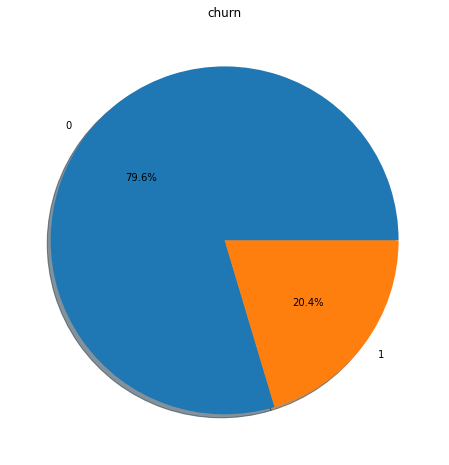

In [10]:
plt.figure(figsize=(18,8))
df['churn'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True);
plt.title('churn');
plt.ylabel('');

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


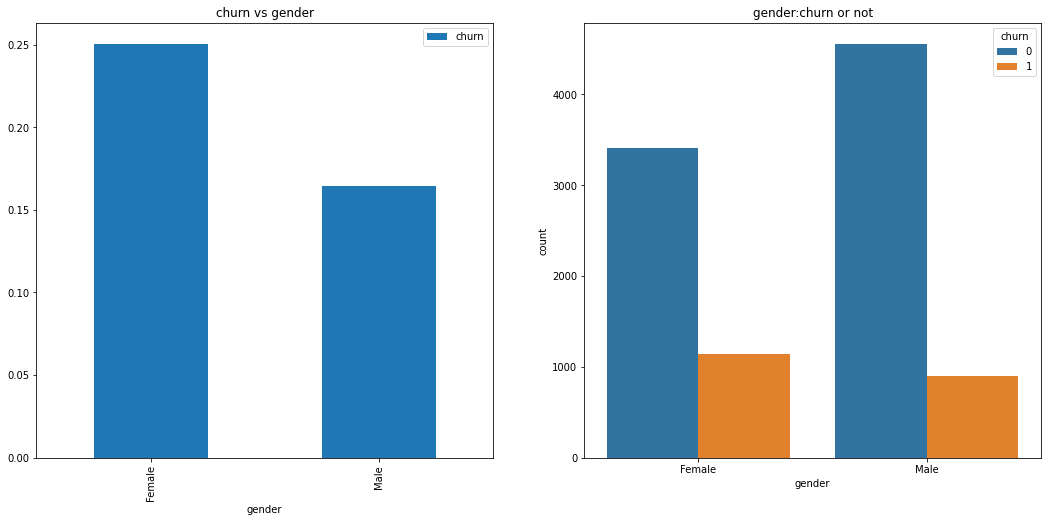

In [11]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['gender','churn']].groupby(['gender']).mean().plot.bar(ax=ax[0])
ax[0].set_title('churn vs gender')
sns.countplot('gender',hue='churn',data=df,ax=ax[1])
ax[1].set_title('gender:churn or not')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


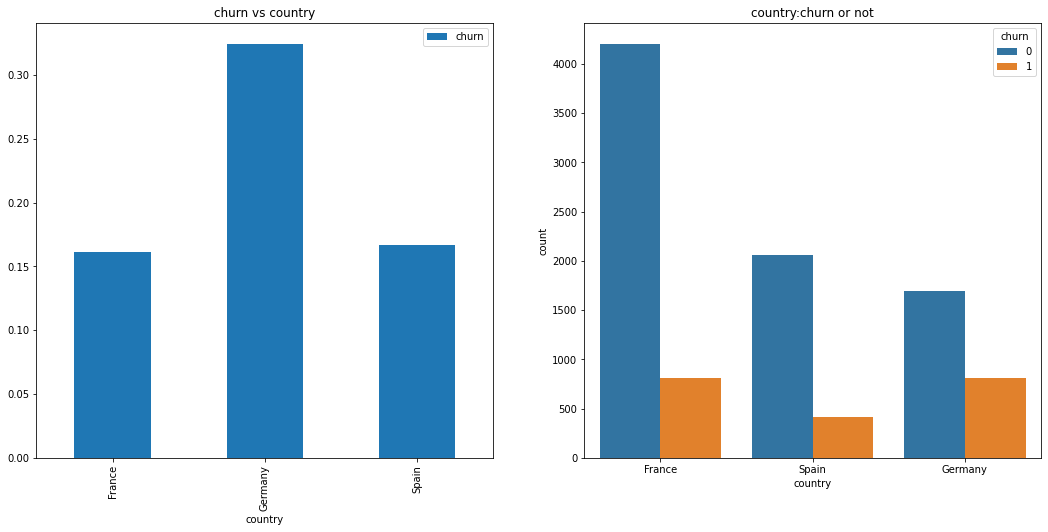

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))
df[['country','churn']].groupby(['country']).mean().plot.bar(ax=ax[0])
ax[0].set_title('churn vs country')
sns.countplot('country',hue='churn',data=df,ax=ax[1])
ax[1].set_title('country:churn or not')
plt.show()

<Figure size 1008x864 with 0 Axes>

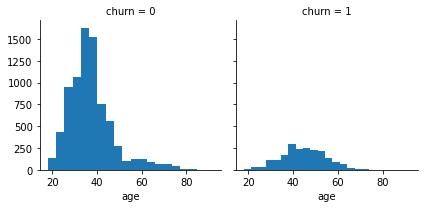

In [13]:
plt.figure(figsize=(14,12))
g=sns.FacetGrid(df,col='churn')
g.map(plt.hist,'age',bins=20)

<Figure size 1008x864 with 0 Axes>

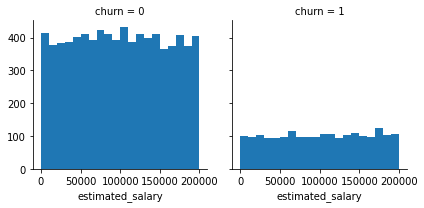

In [14]:
plt.figure(figsize=(14,12))
g=sns.FacetGrid(df,col='churn')
g.map(plt.hist,'estimated_salary',bins=20)

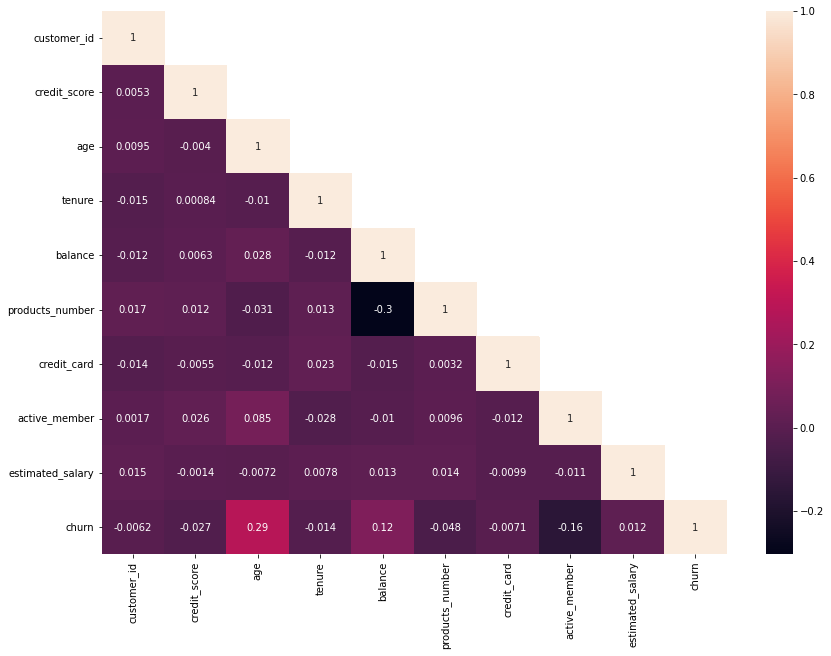

In [15]:
plt.figure(figsize=(14,10))
corr = df.corr()
sns.heatmap(corr, annot=True, mask=~np.tril(corr, 0).astype(bool))

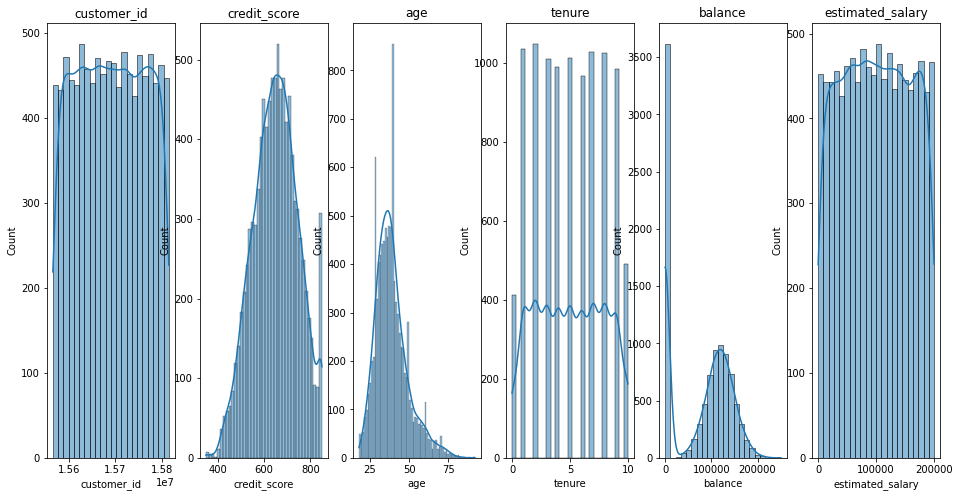

In [16]:
cat_cols = ['country','products_number','credit_card','churn','gender','active_member']
def plot_cols(df,cols_to_despair:list=[]):
    cols =list(df.columns)
    for c in cols_to_despair:
        if c in cols:
            cols.remove(c)
    _,axis =plt.subplots(1,len(cols),figsize=(16,8))
    for i,col in enumerate(cols):
        sns.histplot(df[col],ax=axis[i],kde=True)
        axis[i].set_title(col)
   
plot_cols(df,cat_cols)        

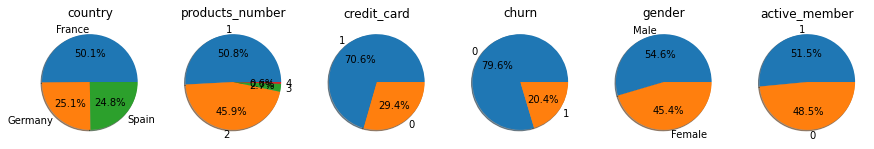

In [17]:
_,axis =plt.subplots(1,len(cat_cols),figsize=(15,15))
for i,cat in enumerate(cat_cols):
  col_data = dict(df[cat].value_counts())
  axis[i].pie(list(col_data.values()),labels=list(col_data.keys()),shadow=True,autopct='%1.1f%%')
  axis[i].set_title(cat)

In [18]:
df = df.drop(['customer_id', 'credit_score'],axis=1)
df.head()

,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [19]:
gender_map={'Female':1,'Male':0}
df['gender']=df['gender'].map(gender_map).astype(int)

In [20]:
country_map={'France':0, 'Spain':1, 'Germany':2}
df['country']=df['country'].map(country_map).astype(int)

In [21]:
x = df.drop('churn',axis=1)
y = df['churn'].values.reshape(10000,1)
from sklearn.model_selection import train_test_split ,cross_val_score,RandomizedSearchCV
X_train ,X_test,y_train ,y_test =train_test_split(x,y,test_size =.2 , random_state=18 , stratify=y)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [23]:
from sklearn.linear_model import LogisticRegression ,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost.sklearn import XGBClassifier

In [24]:
models = {'Logistic Regression': LogisticRegression(),
         'KNN': KNeighborsClassifier(),
         'Decision Tree': DecisionTreeClassifier(),
         'Random Forest': RandomForestClassifier(),
         'Gradient Boosting Classifier':GradientBoostingClassifier(),
         'Support Vector Machine': SVC(),
         'Stochastic Gradien Descent': SGDClassifier(),
         'Naive Bayes': GaussianNB(),
         'xgb Classifier': XGBClassifier()}

In [25]:
def fit_score(models, X_train, X_test, y_train, y_test):
    np.random.seed(42)
    model_scores = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = cross_val_score(model,
                                             X_test,
                                             y_test,
                                            scoring='accuracy',
                                            cv=3
                                            ).mean()

    return model_scores

In [26]:
import warnings
warnings.filterwarnings("ignore")
model_scores = fit_score(models,X_train,X_test,y_train,y_test)

model_scores

{'Logistic Regression': 0.8115004059531796,
 'KNN': 0.8270024147085616,
 'Decision Tree': 0.767006136571354,
 'Random Forest': 0.8579981780881331,
 'Gradient Boosting Classifier': 0.8594974284629456,
 'Support Vector Machine': 0.8589976783380081,
 'Stochastic Gradien Descent': 0.7850046448247348,
 'Naive Bayes': 0.8315001658329993,
 'xgb Classifier': 0.8594959277118197}

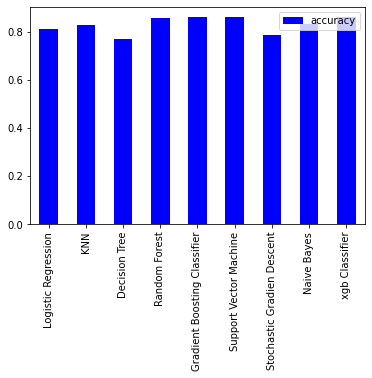

In [27]:
models = pd.DataFrame(model_scores, index=["accuracy"])
models.T.plot.bar(color="blue");